# Word2vec and FastText word embedding with Gensim

In [1]:
from gensim.models import Word2Vec, FastText
import numpy as np
from gensim.test.utils import common_texts
import matplotlib.pyplot as plt
import re

# So sánh hai model word2vec và FastText

In [ ]:
from gensim.models import Word2Vec, FastText

# Huấn luyện mô hình Word2Vec
sentences = [['I', 'love', 'to', 'code'], ['Machine', 'learning', 'is', 'awesome']]
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1)

# Huấn luyện mô hình fastText
fasttext_model = FastText(sentences, vector_size=100, window=5, min_count=1)

# Biểu diễn từ "code" bằng Word2Vec
word2vec_representation = word2vec_model.wv['code']
print("Word2Vec representation:", word2vec_representation)

# Biểu diễn từ "code" bằng fastText
fasttext_representation = fasttext_model.wv['code']
print("FastText representation:", fasttext_representation)


Word2Vec representation: [-0.00713902  0.00124103 -0.00717672 -0.00224462  0.0037193   0.00583312
  0.00119818  0.00210273 -0.00411039  0.00722533 -0.00630704  0.00464722
 -0.00821997  0.00203647 -0.00497705 -0.00424769 -0.00310898  0.00565521
  0.0057984  -0.00497465  0.00077333 -0.00849578  0.00780981  0.00925729
 -0.00274233  0.00080022  0.00074665  0.00547788 -0.00860608  0.00058446
  0.00686942  0.00223159  0.00112468 -0.00932216  0.00848237 -0.00626413
 -0.00299237  0.00349379 -0.00077263  0.00141129  0.00178199 -0.0068289
 -0.00972481  0.00904058  0.00619805 -0.00691293  0.00340348  0.00020606
  0.00475375 -0.00711994  0.00402695  0.00434743  0.00995737 -0.00447374
 -0.00138926 -0.00731732 -0.00969783 -0.00908026 -0.00102275 -0.00650329
  0.00484973 -0.00616403  0.00251919  0.00073944 -0.00339215 -0.00097922
  0.00997913  0.00914589 -0.00446183  0.00908303 -0.00564176  0.00593092
 -0.00309722  0.00343175  0.00301723  0.00690046 -0.00237388  0.00877504
  0.00758943 -0.00954765 -0

# **`Data preprocesing`**

In [8]:
import re


def clean_data_train(filename):
  data_train = []
  label = []
  sentences = []

  # Đọc dữ liệu train
  with open(filename, encoding='UTF-8') as f:
      data = f.readlines()

  for sen in data:
      sentence = re.sub(r'^\d+\.?\s*', '', sen)
      sentence = sentence.strip('\n')
      sentence = sentence.lstrip()

      # Loại bỏ các dấu câu
      sentence = re.sub(r'[,.-?!:]', '', sentence)

      # Chuyển thành chữ thường
      sentence = sentence.lower()
      sentence = sentence.lstrip("\ufeff")

      # Tách dữ liệu và label
      sentences_and_label = sentence.split(" - ")
      sentences.append(sentences_and_label[0])
      label.append(sentences_and_label[1])

      # Tách dữ liệu huấn luyện ra
      words = sentences_and_label[0].split()
      data_train.append(words)
  return data_train, label

data_train, label = clean_data_train("DataFastTextLabel.txt")

print(data_train[0:10])
print("--------------")
print(label[0:50])
print("Số Sữ liệu là: ",len(data_train))


[['bộ', 'y', 'tế', 'phê', 'duyệt', 'vaccine', 'covid-', 'mới'], ['tổ', 'chức', 'từ', 'thiện', 'giúp', 'đỡ', 'người', 'vô', 'gia', 'cư'], ['công', 'nghệ', 'g', 'và', 'tương', 'lai', 'kết', 'nối'], ['cải', 'cách', 'giáo', 'dục', 'những', 'thay', 'đổi', 'đáng', 'chú', 'ý'], ['cuộc', 'bầu', 'cử', 'tổng', 'thống', 'mới', 'diễn', 'ra', 'tại', 'quốc', 'gia', 'a'], ['cách', 'giữ', 'gìn', 'sức', 'khỏe', 'tâm', 'lý', 'trong', 'đại', 'dịch'], ['bão', 'lụt', 'gây', 'thiệt', 'hại', 'nặng', 'nề', 'cho', 'cộng', 'đồng'], ['những', 'xu', 'hướng', 'công', 'nghệ', 'mới', 'trong', 'ngành', 'sản', 'xuất'], ['chương', 'trình', 'học', 'trực', 'tuyến', 'thúc', 'đẩy', 'sự', 'phát', 'triển', 'giáo', 'dục'], ['diễn', 'biến', 'chính', 'trị', 'mới', 'nhất', 'trong', 'nước']]
--------------
['sức khỏe', 'xã hội', 'công nghệ', 'giáo dục', 'chính trị', 'sức khỏe', 'xã hội', 'công nghệ', 'giáo dục', 'chính trị', 'sức khỏe', 'xã hội', 'công nghệ', 'giáo dục', 'chính trị', 'sức khỏe', 'xã hội', 'công nghệ', 'giáo dục',

# Tạo File CSV cho việc train data

In [ ]:
import pandas as pd

# Tạo DataFrame từ danh sách dữ liệu và nhãn
df = pd.DataFrame({"Sentences": data_train, "Label": label})

# Ghi DataFrame vào tệp CSV
df.to_csv("Data_test.csv", index=False, encoding="utf-8-sig")

print("Dữ liệu đã được ghi vào tệp CSV.")


Dữ liệu đã được ghi vào tệp CSV.


# Buil model FastText

In [ ]:
# Đọc dữ liệu từ tệp CSV
df = pd.read_csv("data_train.csv")

# Tạo danh sách các câu và nhãn từ dữ liệu
sentences = [eval(sen) for sen in df["Sentences"]]
labels = df["Label"].tolist()

# Xây dựng mô hình FastText
model = FastText(sentences, vector_size=100, window=5, min_count=1, workers=3, sg=0)

# Huấn luyện mô hình
model.train(sentences, total_examples=model.corpus_count, epochs=3)
print(model)

FastText<vocab=588, vector_size=100, alpha=0.025>


In [ ]:

predicted_label = model.wv["tình hình"]

print("Nhãn dự đoán:", predicted_label)
print("------------------------------")
# Xem sự giống nhau cùng ngữ cảnh
print("Sự giống nhau")
model.wv.similarity("covid", "bệnh")


Nhãn dự đoán: [-0.08731354 -0.0308127   0.10669637 -0.0122185  -0.04508564  0.11326156
 -0.0939533   0.12807615 -0.19579105  0.10884765 -0.19012128 -0.15668869
  0.1657438   0.11746127 -0.0406188  -0.01595727  0.1295895  -0.06684493
  0.1772644  -0.21251075 -0.12635463 -0.05357218 -0.18337564  0.18135183
 -0.16190563 -0.12843774  0.08886353 -0.12890059 -0.13934712 -0.19815864
 -0.05220983 -0.07351628  0.18812823  0.03803188  0.01765141  0.03332051
  0.1338472   0.062672    0.0288823  -0.09330916  0.09749092 -0.04970364
  0.07512007  0.07094852  0.01157362  0.09006464 -0.07399151  0.03467711
 -0.03206085 -0.00107787  0.10568316 -0.10854375 -0.01377387  0.06675586
 -0.08587154  0.20443875 -0.03912868 -0.06978736 -0.04518374  0.2805178
  0.04276643  0.22755855  0.02750637 -0.1167443  -0.22641021  0.09580256
 -0.1707599  -0.17559315  0.00070304  0.06495348  0.01162417  0.05012188
  0.08952804 -0.11344466  0.12148867  0.03210407  0.00344621  0.19083443
  0.1106867   0.0290912   0.04330328  

0.99958616

# Trực quan hóa word Vector

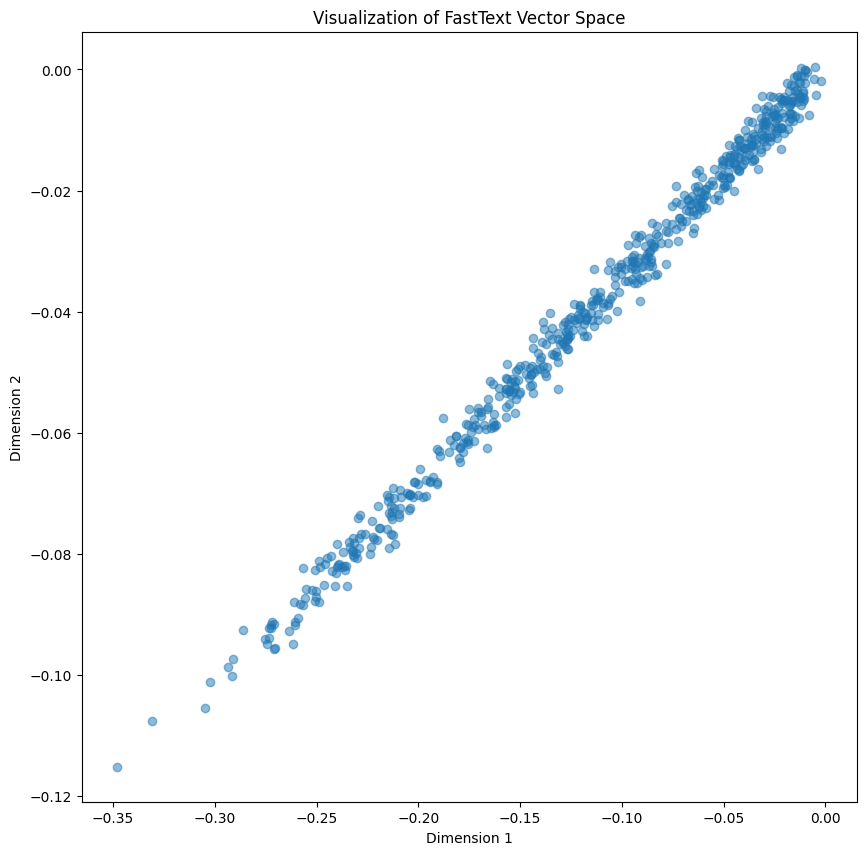

In [ ]:
vectors = model.wv.vectors

# Trực quan hóa không gian vector
plt.figure(figsize=(10, 10))
plt.scatter(vectors[:, 0], vectors[:, 1], alpha=0.5)
plt.title("Visualization of FastText Vector Space")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

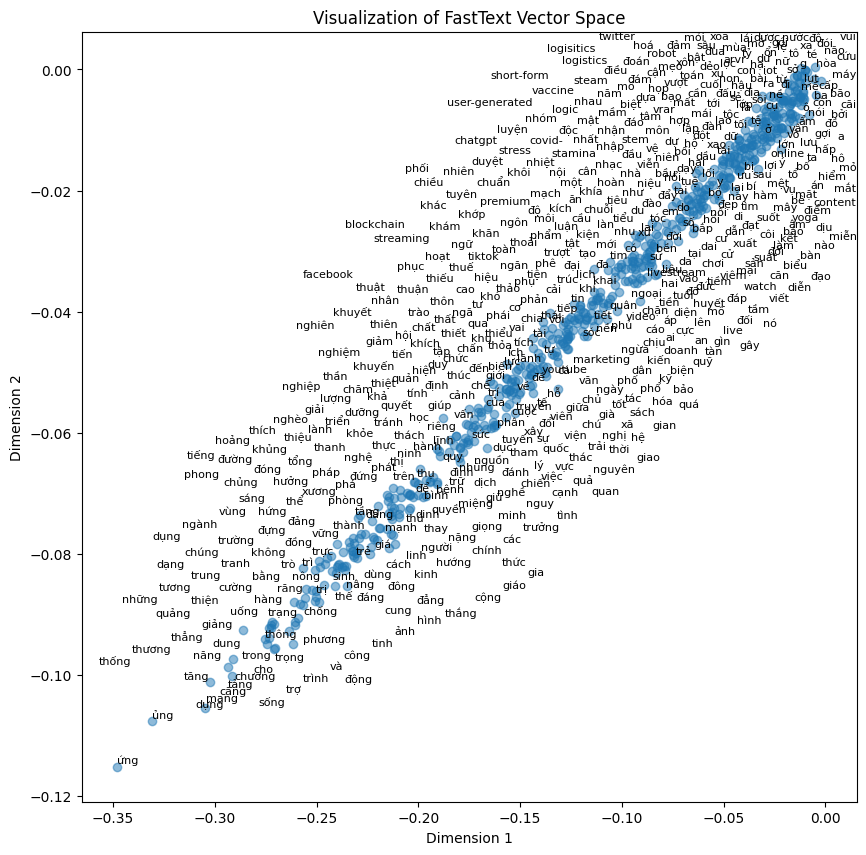

In [ ]:
from adjustText import adjust_text
# Lấy ma trận các vector từ mô hình
vectors = model.wv.vectors

# Lấy danh sách từ trong từ điển
words = model.wv.index_to_key

# Trực quan hóa không gian vector
plt.figure(figsize=(10, 10))
plt.scatter(vectors[:, 0], vectors[:, 1], alpha=0.5)
texts = []
for i, word in enumerate(words):
    texts.append(plt.text(vectors[i, 0], vectors[i, 1], word, fontsize=8))

# Điều chỉnh vị trí các từ để tránh chồng chéo
adjust_text(texts)

plt.title("Visualization of FastText Vector Space")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()


In [ ]:
model.save("fasttext_model.bin")


# Hàm loại bỏ các StopWord Khi người dùng nhập vào

In [9]:
# Đọc file stopword
def read_file_stopword():
  with open("vietnamese-stopwords.txt", encoding="utf-8") as v:
    sw_new=[]
    sw =v.readlines()
    for token in sw:
        a= token.strip()
        sw_new.append(a)
    return sw_new



In [3]:
def del_stopword(text, sw_new):
    stopwords_regex = r'\b(?:{})\b'.format('|'.join(map(re.escape, sw_new)))
    processed_text = re.sub(stopwords_regex, '', text)
    processed_text = re.sub(r'\s{2,}', ' ', processed_text.strip())
    return processed_text

Build mô hình AI ClassiFication

In [10]:
# load medel để sử dụng
model = FastText.load("fasttext_model.bin")

FileNotFoundError: ignored

In [11]:
sentences,label = clean_data_train("DataNewsFT.txt")

In [12]:
len(sentences)
len(label)

4577

In [13]:
# Dữ liệu test
sentences_test, label_test = clean_data_train("Data_Test.txt")

In [14]:
len(sentences_test)

2185

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, Y_train = sentences, label
X_test, Y_test = sentences_test, label_test

# Xây dựng mô hình FastText
model2 = FastText(vector_size=100, window=5, min_count=3, workers=5, sg=0, alpha=0.025, min_alpha=0.001)

# Huấn luyện mô hình
model2.build_vocab(sentences)
model2.train(sentences, total_examples=model2.corpus_count, epochs=10)

# Chỉnh learning rate
model2.alpha = 0.01
model2.min_alpha = 0.0001

# Tiếp tục huấn luyện mô hình
model2.train(sentences, total_examples=model2.corpus_count, epochs=5)

# Truy cập vector của từ "kinh tế"
vector = model2.wv["kinh tế"]


In [24]:
X_train_vector = [model2.wv[sentence].mean(axis=0) for sentence in X_train]
X_test_vector = [model2.wv[sentence].mean(axis=0) for sentence in X_test]
print(X_train_vector[0])

[ 0.90388554 -0.3092747   0.47296852  0.37162018  0.42548546 -0.04061256
  0.6843448   0.35938245 -0.29594383  0.8179421   0.80458605 -0.63468117
  0.49718046  0.07104708  0.07428589 -0.5589408   0.9427624  -0.08040849
  0.5200487  -1.0605386  -0.06870943 -0.55673313 -2.2209485   0.21017385
 -1.5438292  -0.03917243  0.5573175  -0.11620989 -0.15314718 -0.91166633
 -0.12898913  0.5870619   0.73032326  0.62881154 -0.13342425  0.11836872
  0.7949036  -0.35444298  0.84548223  0.17815343  0.06328793  0.05129984
  0.00491627  0.09860282 -0.22999027 -0.5854225  -0.06198208 -0.9908914
  0.01061518  0.6666387   0.9151095  -0.728384    0.274733    0.41055802
 -0.7607723   0.48377228 -0.06492618  0.49626264  0.26239684  1.0195488
 -0.59951556  0.02689672 -0.09570354  0.16625278  0.83952695 -0.4261829
 -0.30831775 -0.49670598  1.0272715  -0.33754987 -0.6897636  -0.4736441
  0.14461687 -0.9859932   0.16948871 -0.65714276  0.29632118  1.0581332
  0.21759918  0.73343366  0.02468475  0.34931517  0.1520

In [25]:

# Huấn luyện mô hình Logistic Regression với SGD optimizer
lr_model = LogisticRegression()
lr_model.fit(X_train_vector, Y_train)

# Dự đoán nhãn cho tập kiểm tra
y_pred = lr_model.predict(X_test_vector)

# Đánh giá mô hình
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)
f1 = f1_score(Y_test, y_pred, average='weighted')
print("F1-score:", f1)

ValueError: ignored

**văn bản in đậm**# Hàm đưa ra dự đoán





In [20]:
# Đọc file stopword
sw_new = read_file_stopword()

In [21]:

# Hàm dự đoán nhãn
def predict_label(text, label, sw_new):
    # loại bỏ stopword
    text = del_stopword(text, sw_new)
    # Biểu diễn các câu bằng các vector từ của mô hình FastText
    text_vector = model2.wv[text.lower().split()].mean(axis=0)

    # Dự đoán nhãn cho câu nhập từ người dùng
    pred_label = lr_model.predict([text_vector])

    # In kết quả dự đoán
    print("Predicted Label:", pred_label[0])
    if pred_label == label:
      print("Dự đoán đúng")
    else:
      print("Dự đoán sai")


In [ ]:
predict_label("Kinh tế học giáo dục con người kiếm tiền","giáo dục", sw_new)

Predicted Label: giáo dục
Dự đoán đúng


In [ ]:
predict_label("kinh tế đất nước đang khó khăn", "kinh tế", sw_new)

Predicted Label: kinh tế
Dự đoán đúng


In [ ]:
predict_label("Hiện nay covid-19 đã có vacine chữa bệnh cho mọi người","y tế", sw_new)

Predicted Label: y tế
Dự đoán đúng


In [ ]:
predict_label("Bạo loạn ở nhiều tỉnh thành","xã hội", sw_new)

Predicted Label: công nghệ
Dự đoán sai


In [ ]:
predict_label("Sự trỗi dậy của tiktok đang tạo ra công ăn việc làm mới", "xã hội", sw_new)

Predicted Label: xã hội
Dự đoán đúng


In [ ]:
predict_label("Công nghệ Nano đang được nghiên cứu ở Việt Nam", "công nghệ", sw_new)

Predicted Label: công nghệ
Dự đoán đúng


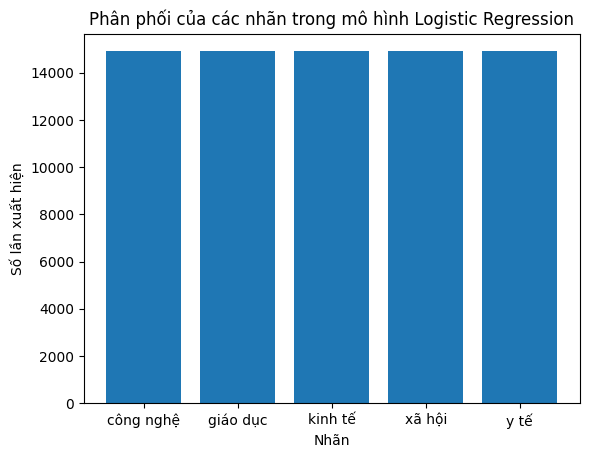

In [ ]:
import pandas as pd
y_train_series = pd.Series(Y_train)

# Đếm số lần xuất hiện của mỗi nhãn
label_counts = y_train_series.value_counts()

# Vẽ biểu đồ cột
plt.bar(label_counts.index, label_counts.values)
plt.xlabel('Nhãn')
plt.ylabel('Số lần xuất hiện')
plt.title('Phân phối của các nhãn trong mô hình Logistic Regression')
plt.show()


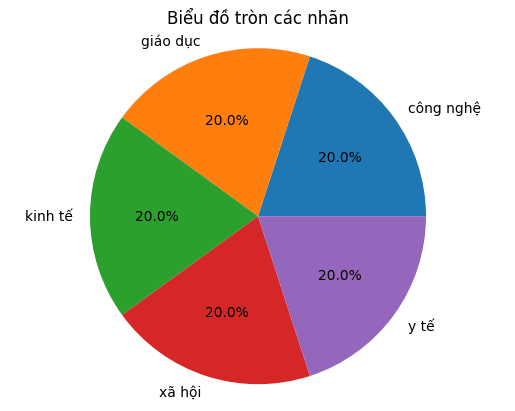

In [ ]:
plt.pie(label_counts.values, labels=label_counts.index, autopct='%1.1f%%')
plt.title('Biểu đồ tròn các nhãn')
plt.axis('equal')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

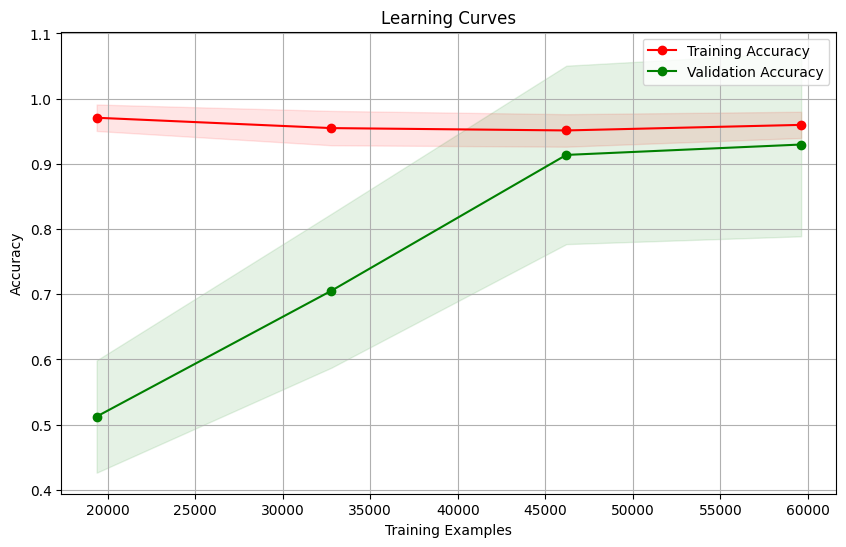

In [ ]:
from sklearn.model_selection import learning_curve

# Calculate learning curves
train_sizes, train_scores, val_scores = learning_curve(lr_model, X_train_vector, Y_train, cv=5, scoring='accuracy')

# Calculate mean and standard deviation of training scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation of validation scores
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.title("Learning Curves")
plt.xlabel("Training Examples")
plt.ylabel("Accuracy")
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Accuracy")
plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Validation Accuracy")
plt.legend(loc="best")
plt.show()